In [19]:
from qiskit.transpiler.passes import SabreSwap as SabreSwap_v025
from qiskit.transpiler.passes import SabreLayout as SabreLayout_v025
from qiskit.transpiler.passes.routing.sabre_swap_v020 import SabreSwap as SabreSwap_v020
from qiskit.transpiler.passes.layout.sabre_layout_v020 import SabreLayout as SabreLayout_v020
from qiskit.transpiler.passes.routing.sabre_swap_v020_lookahead import SabreSwap as SabreSwap_v020_lookahead
from ulti.circuits import get_circuit_list, sort_circuits_by_depth
from ulti.coupling_maps import file_to_coupling_map
from ulti.pass_managers import build_pm
from ast import literal_eval
import matplotlib.pyplot as plt
import random
import time
random.seed(42)

In [20]:
qc_name = "size10_depth_1-10"
cp_name = "heavy_hex_27"

In [21]:
cm = file_to_coupling_map(f'coupling_maps/{cp_name}.txt')

# pass manager for Sabre v0.25
rp_v025 = SabreSwap_v025
lp_v025 = SabreLayout_v025
pm_v025 = build_pm(rp_v025, lp_v025, cm)

# pass manager for Sabre v0.20
rp_v020 = SabreSwap_v020
lp_v020 = SabreLayout_v020
pm_v020 = build_pm(rp_v020, lp_v020, cm)

# pass manager for Sabre v0.20 with lookahead
rp_v020_lookahead = SabreSwap_v020_lookahead
lp_v020_lookahead = SabreLayout_v020
pm_v020_lookahead = build_pm(rp_v020_lookahead, lp_v020_lookahead, cm)

qc_list = get_circuit_list([f'circuits/{qc_name}/'])
qc_list = sort_circuits_by_depth(qc_list)

In [22]:
qc = qc_list[1].decompose()
print("Depth of the circuit before transpiled:", qc.depth())

Depth of the circuit before transpiled: 2


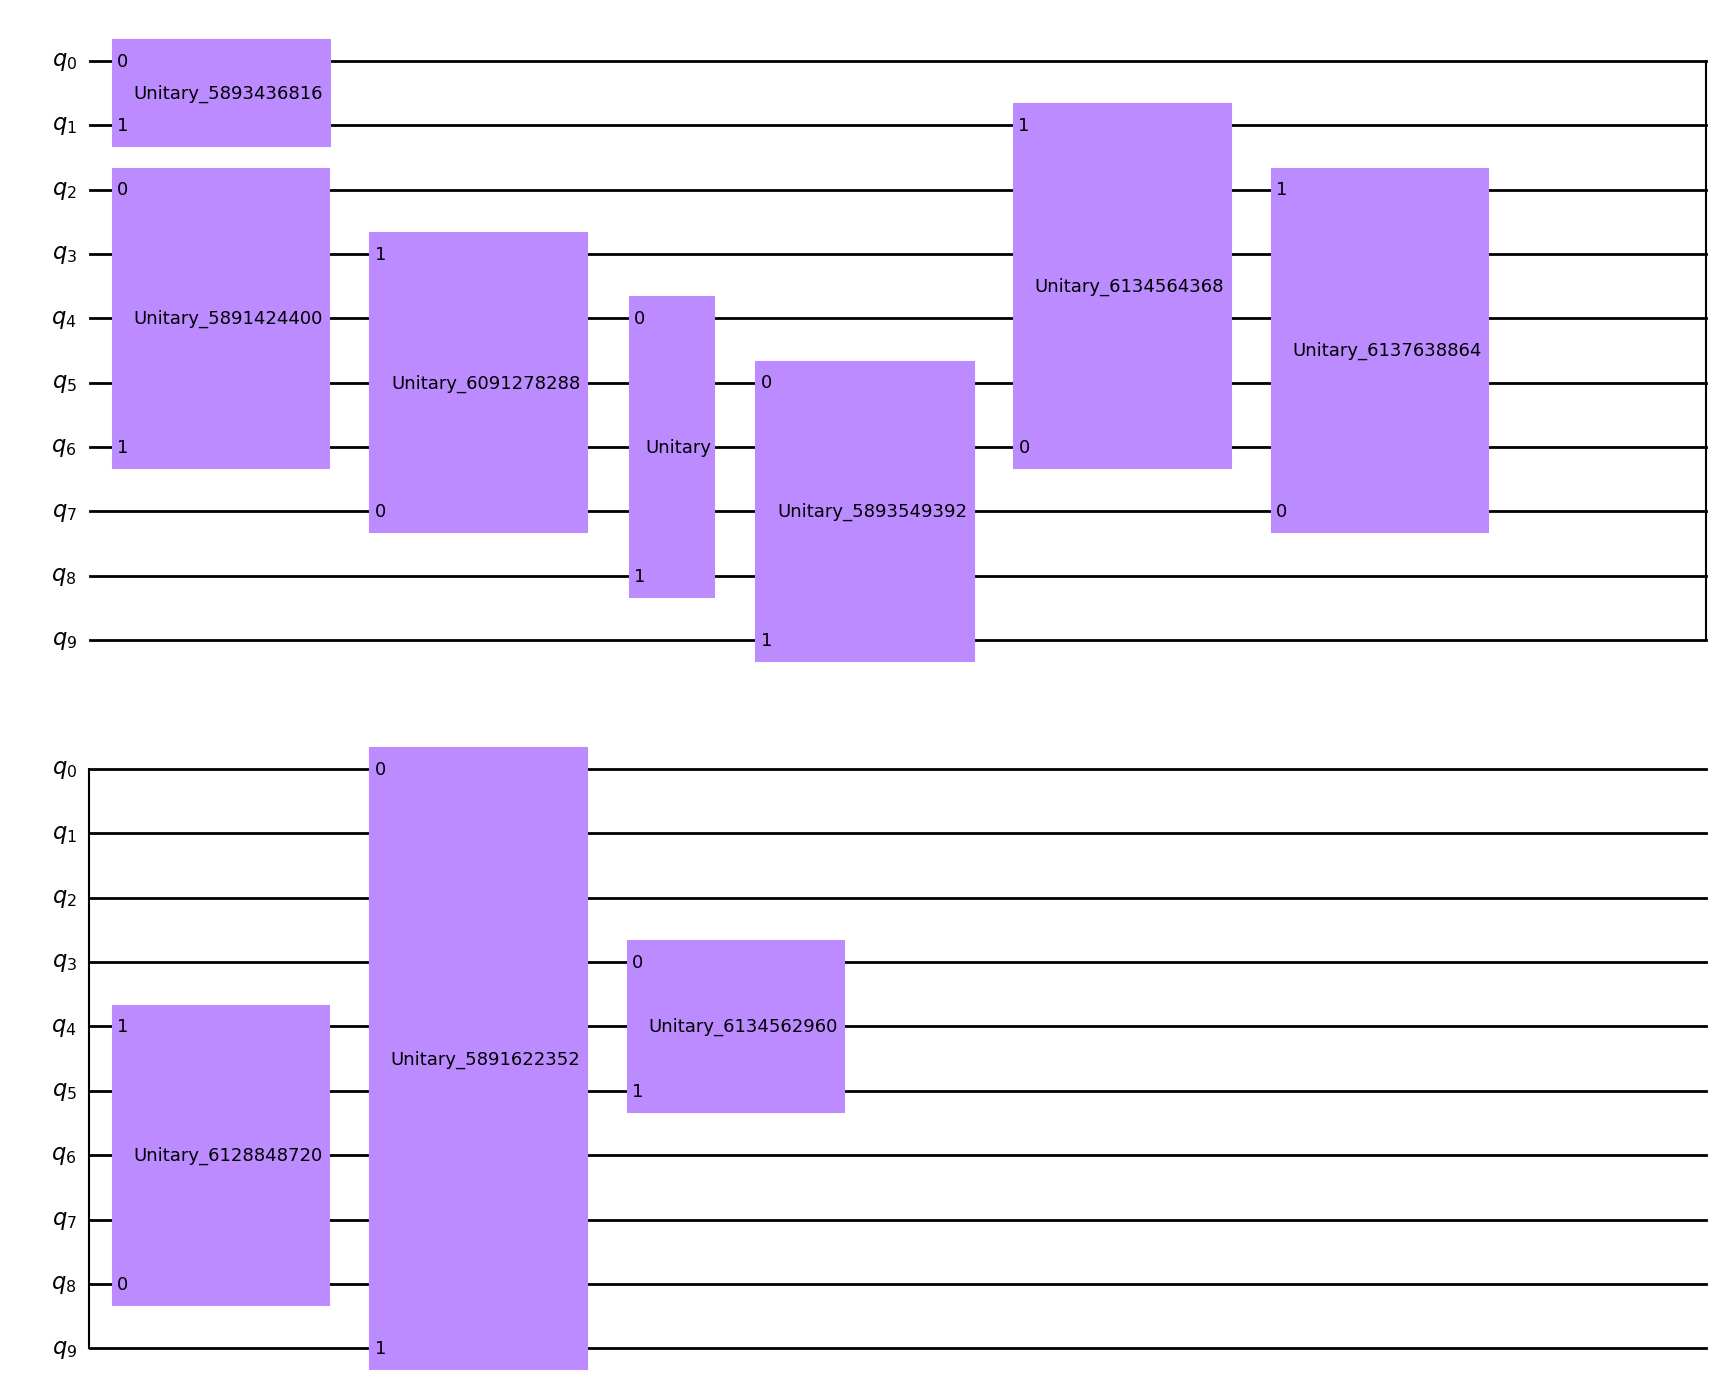

In [23]:
qc.draw(output='mpl')

In [24]:
# Start timing the transpilation for v0.25
start_time = time.time()
qc_tr_25 = pm_v025.run(qc)
duration_25 = time.time() - start_time

# Start timing the transpilation for v0.20
start_time = time.time()
qc_tr_20 = pm_v020.run(qc)
duration_20 = time.time() - start_time

# Start timing the transpilation for v0.20 with lookahead
start_time = time.time()
qc_tr_20_lookahead = pm_v020_lookahead.run(qc)
duration_20_lookahead = time.time() - start_time

# Print the depth and duration for each transpilation
print(f"{'Depth of the circuit after transpiled v0.25:':<60}{qc_tr_25.depth():<10}{'Time taken:':<20}{duration_25:.5f} seconds")
print(f"{'Depth of the circuit after transpiled v0.20:':<60}{qc_tr_20.depth():<10}{'Time taken:':<20}{duration_20:.5f} seconds")
print(f"{'Depth of the circuit after transpiled v0.20 with lookahead:':<60}{qc_tr_20_lookahead.depth():<10}{'Time taken:':<20}{duration_20_lookahead:.5f} seconds")

Depth of the circuit after transpiled v0.25:                5         Time taken:         0.02164 seconds
Depth of the circuit after transpiled v0.20:                8         Time taken:         0.02739 seconds
Depth of the circuit after transpiled v0.20 with lookahead: 9         Time taken:         0.05053 seconds


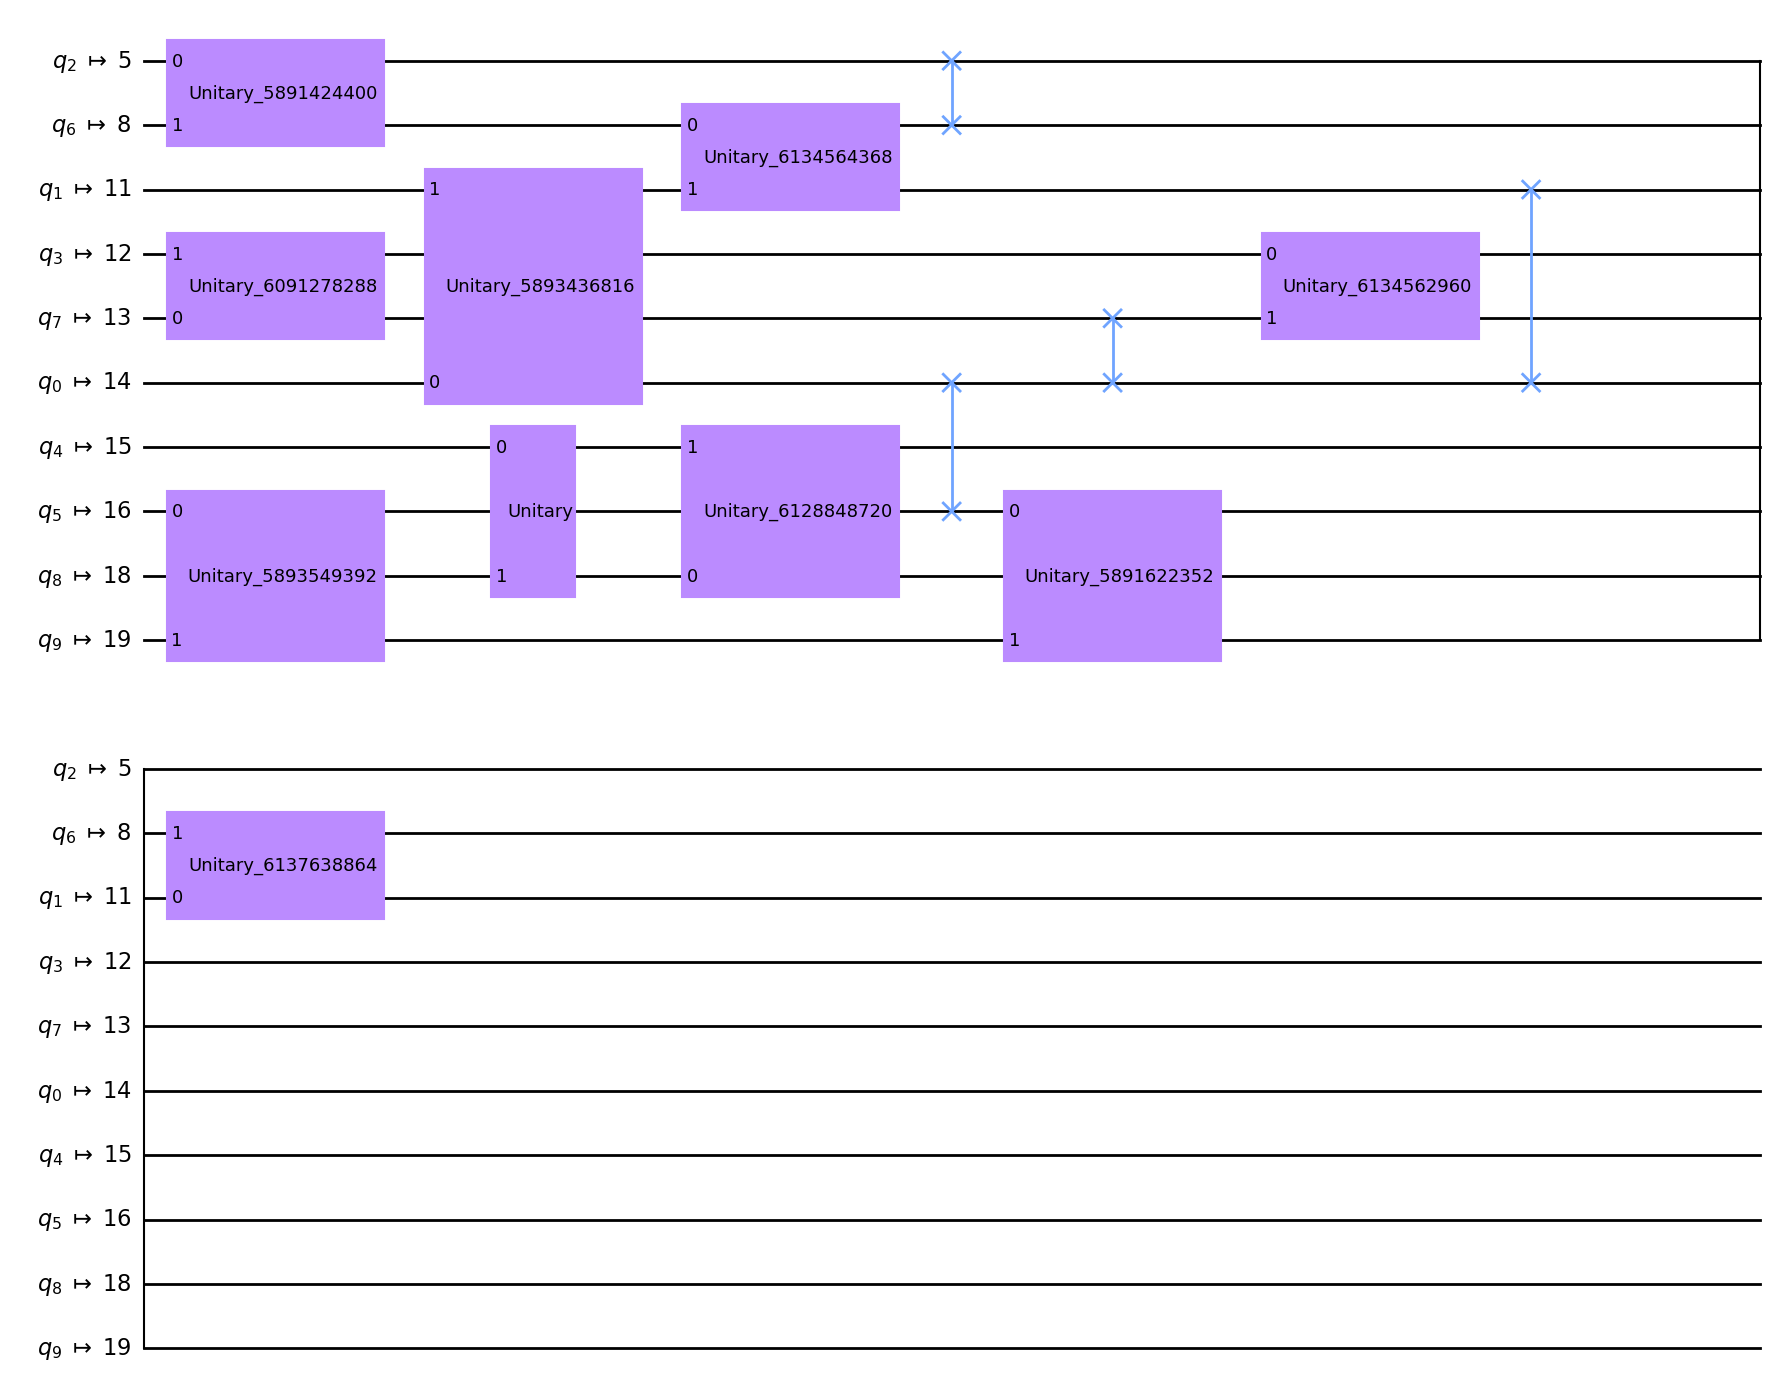

In [25]:
qc_tr_25.draw(output='mpl', idle_wires=False)

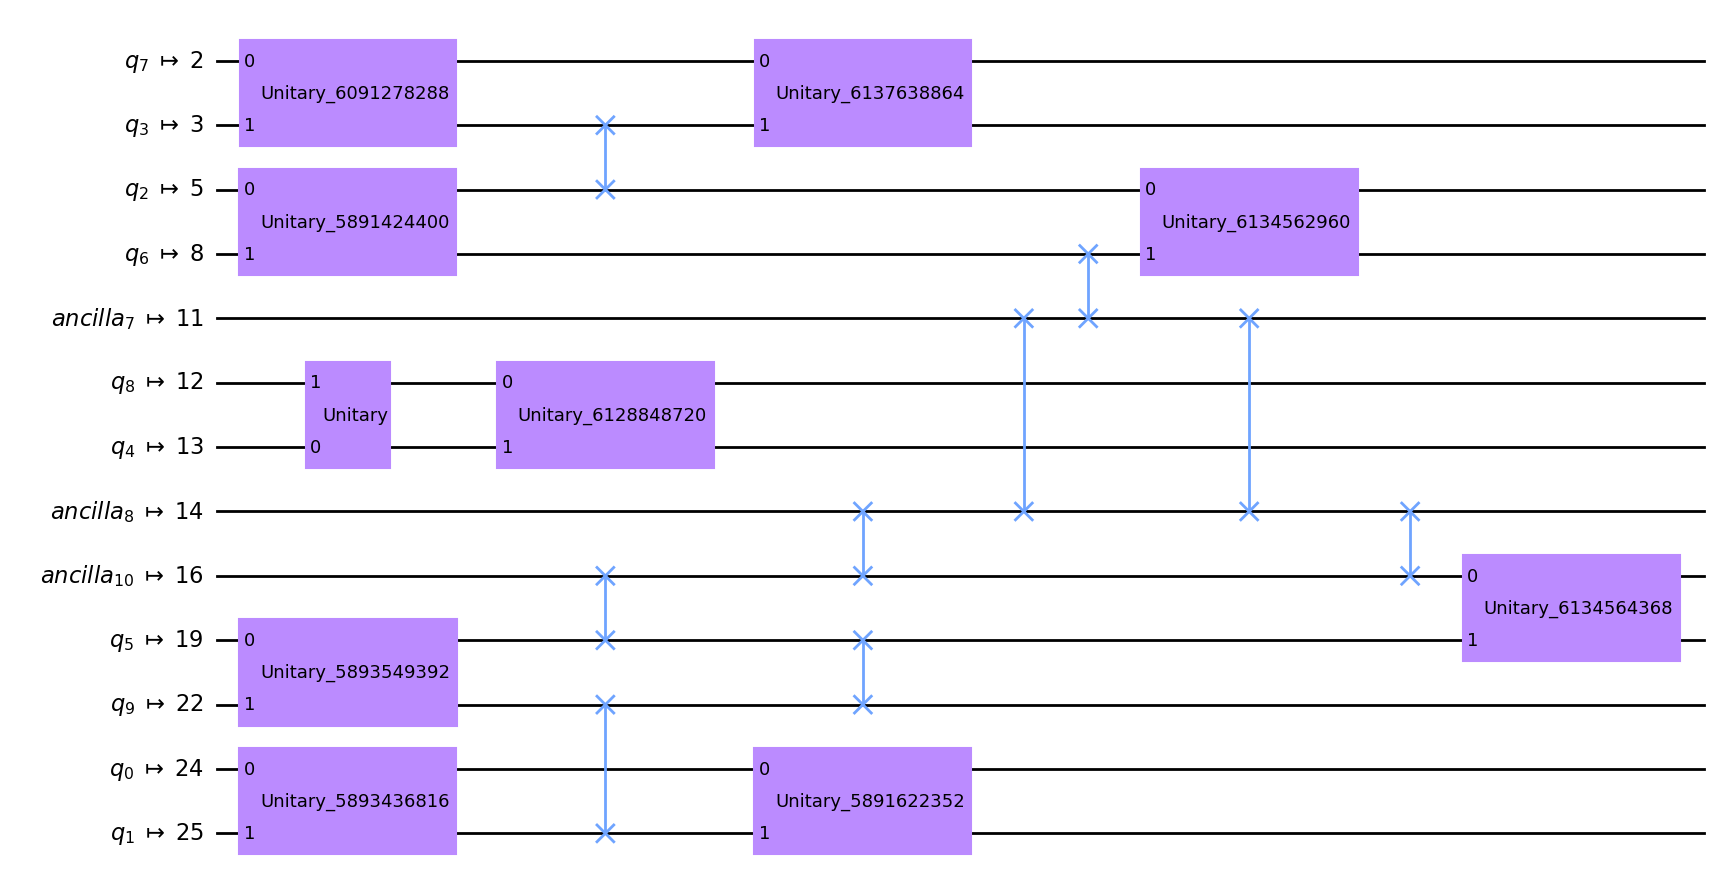

In [26]:
qc_tr_20.draw(output='mpl', idle_wires=False)

In [27]:
qc_tr_20_lookahead.draw(output='mpl', idle_wires=False)

KeyboardInterrupt: 